# Exploration Data Analysis

In this notebook we will explore the data we have and try to find some insights.

First of all, we import the libraries we will use. Those are common libraries for data analysis and visualization. `pandas`, `numpy` and `matplotlib` are common libraries for data analysis and visualization. `seaborn` is a library that uses `matplotlib` to create more beautiful plots.

While doing it, we will also prepare and clean the data. We will use the information gathered here to create a function which does everything in one step, so that we can flexibly clean and prepare the data for other steps.

Note to make the markdown and code cells correspond to each other it is important to run the cells in order. This is because we are modified the data while describing it. If you want to run all cells at once, you can use the `Run All` option in the `Cell` menu.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)


Below, we import the data. We will use the `read_csv` function from `pandas` to read the data from the csv file.

We have two datasets: `felixstowe_rotterdam` and `rotterdam_felixstowe`. The first one contains the data from Felixstowe to Rotterdam and the second one from Rotterdam to Felixstowe.

Respectively, we name those datasets `df_fxt_rtm` and `df_rtm_fxt`. Considering the UN codes for those places are NLRTM, GBFXT and DEHAM. And raw, since well, they are still raw at that time without cleaning.


For `df_fxt_rtm` uses ' as its quoting character, so we need to specify it in the `read_csv` function. Otherwise, it will consider the double quotes as part of the data and that leads to an error.

Below we also directly see, that column 15, 'Draught', has mixed types. We will need to fix that later.

We also combined those two raw dataframes into `df_combined`.

In [2]:
df_fxt_rtm = pd.read_csv(
    '../resources/felixstowe_rotterdam/felixstowe_rotterdam.csv', quotechar="'")
df_rtm_ham = pd.read_csv(
    '../resources/rotterdam_hamburg/rotterdam_hamburg.csv')
df_combined = pd.concat(
    [df_fxt_rtm, df_rtm_ham], ignore_index=True)


C:\Users\Artur\AppData\Local\Temp\ipykernel_15504\424385754.py:1: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df_fxt_rtm = pd.read_csv(
C:\Users\Artur\AppData\Local\Temp\ipykernel_15504\424385754.py:3: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df_rtm_ham = pd.read_csv(


# Univariate Non-Graphical Analysis

#### Shape of the data
Below we investigate the dataframes' dimensions using the `shape` attribute of the dataframes.

There we see that `df_fxt_rtm` has 26 columns while `df_rtm_fxt` has 25 columns. This is problematic thus we need to look into it.

`df_fxt_rtm` has 527359 entries, while `df_rtm_ham` has 500142 entries. Thus they are roughly the same size.

In [3]:
print("df_fxt_rtm:", df_fxt_rtm.shape)
print("df_rtm_ham:", df_rtm_ham.shape)
print("df_combined:", df_combined.shape)


df_fxt_rtm: (527359, 26)
df_rtm_ham: (500142, 25)
df_combined: (1027501, 26)


#### Removing duplicates
Before doing anything else, one should always remove duplicated entries as they serve no purpose at all.

`df_fxt_rtm` has 9743 duplicated entries while `df_rtm_fxt` has 23916 duplicated entries.

Why the second one has so much more duplicated entries might be anyone's guess, but we simply drop them.

In [4]:
# The very first action is to look for duplicate entries. Those have no value.

print(f"df_fxt_rtm has {df_fxt_rtm.duplicated().sum()} duplicates")
print(f"df_rtm_ham has {df_rtm_ham.duplicated().sum()} duplicates")
print(
    f"Thus combined, they have {df_combined.duplicated().sum()} duplicates")

df_fxt_rtm = df_fxt_rtm.drop_duplicates()
df_rtm_ham = df_rtm_ham.drop_duplicates()
df_combined = pd.concat(
    [df_fxt_rtm, df_rtm_ham], ignore_index=True)


df_fxt_rtm has 9743 duplicates
df_rtm_ham has 23916 duplicates
Thus combined, they have 33659 duplicates


### Investigating the columns
Here we are investigating the columns or labels of the data set.

As mentioned above, `df_fxt_rtm` has 26 columns while `df_rtm_fxt` has 25 columns.

It turns out that the both datasets have 25 labels in common and thus `df_fx_rtm` just happens to have on more datapoint, 'd'. Because of this and generally because we can only work on data which is common to datasets, we drop that differing column.


In [5]:
def show_column_diff_and_sim(df1: pd.DataFrame, df2: pd.DataFrame):
    difference = df1.columns.difference(df2.columns)
    intersection = df1.columns.intersection(df2.columns)
    print(f"The two dataframes have {intersection.shape[0]} columns in common:",
          intersection.values)
    print(f"{difference.shape[0]} dataframes differ between the two dataframes:",
          difference.values)
    
show_column_diff_and_sim(df_fxt_rtm, df_rtm_ham)

# The only difference between the two dataframes is the column 'd' in the fxt_rtm dataframe.
# Since one dataframe doesn't even have this column, we will just drop it.
df_fxt_rtm = df_fxt_rtm.drop(
    columns=['d']) if 'd' in df_fxt_rtm else df_fxt_rtm
df_combined = pd.concat(
    [df_fxt_rtm, df_rtm_ham], ignore_index=True)


The two dataframes have 25 columns in common: ['TripID' 'MMSI' 'StartLatitude' 'StartLongitude' 'StartTime'
 'EndLatitude' 'EndLongitude' 'EndTime' 'StartPort' 'EndPort' 'ID' 'time'
 'shiptype' 'Length' 'Breadth' 'Draught' 'Latitude' 'Longitude' 'SOG'
 'COG' 'TH' 'Destination' 'Name' 'Callsign' 'AisSourcen']
1 dataframes differ between the two dataframes: ['d']


First of all, the one column more was the label 'd'. The exact meaning of this label is unknown, but since we dropped it anyways, it is irrelevant.

- 'ID', : the ID of the AIS message
- 'time', : the time of the AIS message
- 'shiptype', : the type of the ship
- 'Length', : the length of the ship in meters
- 'Breadth', : the breadth of the ship in meters
- 'Draught', : the draught of the ship in meters. Draught is the depth of water the ship displaces
- 'Latitude', : the latitude of the ship
- 'Longitude', : the longitude of the ship
- 'SOG', : speed over ground in knots
- 'COG', : course over ground in degrees
- 'TH', : true heading. The angle between 'true north' and the direction the ship is heading
- 'Destination', : the intended destination of the ship at the time of the AIS message
- 'Name', : the name of the ship
- 'Callsign', : the call sign of the ship
- 'AisSourcen': the source of the AIS data
- 'd' : Unknown column

Now, let's investigate the data of the columns.

By looking at the first 5 (the head) of the dataframe, we can see a few infos about the data.
- 'TripID', 'MMSI' and 'ID' are identifiers expressed in integers. They are meaningless for us, as they don't don't represent any information. It is frequently the case that such identifiers become bigger with time and thus it could be a good proxy for time. But since we have the time, we don't need it.

- The time, 'StartTime', 'EndTime', 'time', is expressed in strings. Fortunately they seem to be in a standard format. One should transform it to a datetime object. Even better would be to transform it to a timestamp, since machine learning algorithms work better with continuous variables.
  
- 'StartPort', 'EndPort', 'Destination', 'Name', 'Callsign', 'aisSource' are all categorical variables expressed as strings. 'shiptype' is a categorical variable expressed in integers. We need further investigation to see their usefullness.
  
- 'Length', 'Breadth', 'Draught', 'StartLatitude', 'EndLatitude', 'StartLongitude', 'EndLongitude', 'Latitude', 'Longitude', 'SOG', 'COG', 'TH' are expressed in floats. They all seem very useful for our task and also in the right format.

What one need to do to those datatypes to make them more usefull:


- 'Length', 'Breadth', 'Draught': continuous numerical variables. They all need to be larger than 0. Theoreticall 0 'Draught' could exist, but this is not realistic. 'Length' and 'Breadth' are unchangeable during a trip and probably also during the lifetime of a ship. Thus a differing 'Length' or 'Breadth' entry withing the same 'TripID' is most likely an error and should be corrected to the most frequent number. From our intuition, those attributes are all correlated. Thus it might be a good idea to combine those data points into some sort of size score.
- 'SOG': continuous numerical variable. It can be 0, but not negative. It is the speed of the ship.
- '*Latitude', '*Longitude', 'COG' and 'TH': continuous cyclical variables. They all represent data which cycles around, that it data at the two very end ranges are actually close togetehr. One might need to represent those thigns in cos and sin to make them more useful. COG and TH can not be bigger tha 359 or smaller than 0.


One can also categories to what those labels belong to.
- ship: 
    - Identifiers: 'MMSI', 'Name', 'Callsign'
    - 
    - Dimensions: 'Length', 'Breadth', 'Draught', 'shiptype'
    - Attribute at a certain time: 
      - 'time'
      - 'SOG, 
      - 'COG', 'TH',
      - 'Latitude', 'Longitude', 'Destination'
- trip:
    - 'TripID'
    - 'StartTime', 'EndTime'
    - 'StartLatitude', 'EndLatitude', 'StartLongitude', 'EndLongitude', 'StartPort', 'EndPort'
- entry:
    - 'ID'
    - 'd'?, 'AisSourcen'

This is useful information, because a ship is guaranteed to only have and know its own data. Also it seems that much of the data belonging to the "trip" was added after the fact.

In [6]:
df_combined.head(10)


TripID       MMSI  StartLatitude  StartLongitude         StartTime  \
0   40903  220284000          51.95            1.31  2016-01-21 08:46   
1   40903  220284000          51.95            1.31  2016-01-21 08:46   
2   40903  220284000          51.95            1.31  2016-01-21 08:46   
3   40903  220284000          51.95            1.31  2016-01-21 08:46   
4   40903  220284000          51.95            1.31  2016-01-21 08:46   
5   40903  220284000          51.95            1.31  2016-01-21 08:46   
6   40903  220284000          51.95            1.31  2016-01-21 08:46   
7   40903  220284000          51.95            1.31  2016-01-21 08:46   
8   40903  220284000          51.95            1.31  2016-01-21 08:46   
9   40903  220284000          51.95            1.31  2016-01-21 08:46   

   EndLatitude  EndLongitude           EndTime   StartPort    EndPort  \
0         51.9          4.36  2016-01-21 17:17  FELIXSTOWE  ROTTERDAM   
1         51.9          4.36  2016-01-21 17:17  FELIXSTOWE  ROTTERDAM   
2         51.9          4.36  2016-01-21 17:17  FELIXSTOWE  ROTTERDAM   
3         51.9          4.36  2016-01-21 17:17  FELIXSTOWE  ROTTERDAM   
4         51.9          4.36  2016-01-21 17:17  FELIXSTOWE  ROTTERDAM   
5         51.9          4.36  2016-01-21 17:17  FELIXSTOWE  ROTTERDAM   
6         51.9          4.36  2016-01-21 17:17  FELIXSTOWE  ROTTERDAM   
7         51.9          4.36  2016-01-21 17:17  FELIXSTOWE  ROTTERDAM   
8         51.9          4.36  2016-01-21 17:17  FELIXSTOWE  ROTTERDAM   
9         51.9          4.36  2016-01-21 17:17  FELIXSTOWE  ROTTERDAM   

         ID              time  shiptype  Length  Breadth Draught  Latitude  \
0  39542658  2016-01-21 08:47        79     196       26    6.68     51.95   
1  39543951  2016-01-21 08:48        79     196       26    6.68     51.95   
2  39545048  2016-01-21 08:49        79     196       26    6.68     51.95   
3  39545774  2016-01-21 08:50        79     196       26    6.68     51.95   
4  39547226  2016-01-21 08:51        79     196       26    6.68     51.95   
5  39548224  2016-01-21 08:52        79     196       26    6.68     51.95   
6  39549905  2016-01-21 08:53        79     196       26    6.68     51.94   
7  39551344  2016-01-21 08:54        79     196       26    6.68     51.94   
8  39551623  2016-01-21 08:55        79     196       26    6.68     51.94   
9  39553660  2016-01-21 08:56        79     196       26    6.68     51.94   

   Longitude   SOG    COG   TH  Destination            Name Callsign  \
0       1.31   1.2  264.0  297  RTM-FXT-RTM  SUECIA.SEAWAYS    OVPB2   
1       1.31   2.3  285.0  293  RTM-FXT-RTM  SUECIA.SEAWAYS    OVPB2   
2       1.30   4.6  280.0  262  RTM-FXT-RTM  SUECIA.SEAWAYS    OVPB2   
3       1.30   3.7  251.0  218  RTM-FXT-RTM  SUECIA.SEAWAYS    OVPB2   
4       1.30   3.8  210.0  180  RTM-FXT-RTM  SUECIA.SEAWAYS    OVPB2   
5       1.30   4.8  170.0  163  RTM-FXT-RTM  SUECIA.SEAWAYS    OVPB2   
6       1.30   6.3  162.0  162  RTM-FXT-RTM  SUECIA.SEAWAYS    OVPB2   
7       1.30   8.1  162.0  163  RTM-FXT-RTM  SUECIA.SEAWAYS    OVPB2   
8       1.30   9.8  169.0  171  RTM-FXT-RTM  SUECIA.SEAWAYS    OVPB2   
9       1.30  11.1  175.0  175  RTM-FXT-RTM  SUECIA.SEAWAYS    OVPB2   

  AisSourcen  
0      H7001  
1      H7001  
2      H7001  
3      H7001  
4      H7001  
5      H7001  
6      H7001  
7      H7001  
8      H7001  
9      H7001

### Removing duplicate IDs

Looking at the dataframe, we notice that 'ID' is simply an identifier for an entry. Having the same 'ID' multiple times is an error. Thus we drop those entries.

In [7]:
print(df_fxt_rtm['ID'].value_counts().value_counts())
print(df_rtm_ham['ID'].value_counts().value_counts())
print(df_combined['ID'].value_counts().value_counts())

df_fxt_rtm = df_fxt_rtm.drop_duplicates(subset=['ID'], keep='first')
df_rtm_ham = df_rtm_ham.drop_duplicates(subset=['ID'], keep='first')
df_combined = pd.concat(
    [df_fxt_rtm, df_rtm_ham], ignore_index=True)


count
1    416988
2     47428
3      1924
Name: count, dtype: int64
count
1    449345
2     11648
3      1195
Name: count, dtype: int64
count
1    866333
2     59076
3      3119
Name: count, dtype: int64


### Investigating the data types
We use the 'info' method to get a quick look on our data. Most of our data looks like it should. Note strings are represented as 'object' in pandas.

There are only two things which look problematic. Firstly, the label 'Draught' has the type 'object'. This might indicate either a string, whoever this can't be as we have seen that 'Draught' is a float. Thus it should look like 'Length' and 'Breadth', aka a float64. That it isn't indicates that there is a mix of datatypes which pandas analyzed. The most likely option is that somehow a string got mixed into it and it is likely that this string is some sort of NaN value. We will need to investigate this further.

Another issue is that 'AisSourcen' in `df_fxt_rtm` has a few NaN values.

In [8]:
print(df_fxt_rtm.info())
print(df_rtm_ham.info())


<class 'pandas.core.frame.DataFrame'>
Index: 466340 entries, 0 to 527358
Data columns (total 25 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   TripID          466340 non-null  int64  
 1   MMSI            466340 non-null  int64  
 2   StartLatitude   466340 non-null  float64
 3   StartLongitude  466340 non-null  float64
 4   StartTime       466340 non-null  object 
 5   EndLatitude     466340 non-null  float64
 6   EndLongitude    466340 non-null  float64
 7   EndTime         466340 non-null  object 
 8   StartPort       466340 non-null  object 
 9   EndPort         466340 non-null  object 
 10  ID              466340 non-null  int64  
 11  time            466340 non-null  object 
 12  shiptype        466340 non-null  int64  
 13  Length          466340 non-null  int64  
 14  Breadth         466340 non-null  int64  
 15  Draught         466340 non-null  object 
 16  Latitude        466340 non-null  float64
 17  Longitude      

Since 'Draught' showed unexpected behaviour, we investigate it further. By looking at the most frequent values, we see that 'Draught' has ? as the fourth most common value. This indicates that ? is used as another NaN value. Thus we need to replace it with NaN across the dataframe.

In the end it turns out that 'Draught', 'Destination', 'Name', 'Callsign' and 'aisSource' have NaN values. How to deal with it we will see later. Sometimes it is better to drop the entries, sometimes it is better to replace it with the most common value.

After replacing ? with NaN across all columns in both dataframes, we see that there are more NaN values than before indicated.

In [9]:
print("10 most common values of df_rtm_ham",
      df_rtm_ham['Draught'].value_counts().index[:6].tolist())
print("10 most common values of df_fxt_rtm",
      df_fxt_rtm['Draught'].value_counts().index[:6].tolist())

df_fxt_rtm = df_fxt_rtm.replace("?", np.nan)
df_rtm_ham = df_rtm_ham.replace("?", np.nan)
df_combined = pd.concat(
    [df_fxt_rtm, df_rtm_ham], ignore_index=True)


__sum_of_nan_dict = df_combined.isna().sum().to_dict()
print("Labels with NaN values:")
for k, v in {k: v for k, v in __sum_of_nan_dict.items() if v != 0}.items():
    if v != 0:
        print(f"{k} : {v}")

# Convert the rest of 'Draught' to float.
df_fxt_rtm['Draught'] = pd.to_numeric(df_fxt_rtm['Draught'])
df_rtm_ham['Draught'] = pd.to_numeric(df_rtm_ham['Draught'])
df_combined = pd.concat(
    [df_fxt_rtm, df_rtm_ham], ignore_index=True)


10 most common values of df_rtm_ham ['7.81', 11.0, 7.81, '?', 10.5, '7.58']
10 most common values of df_fxt_rtm [6.68, 6.6, 4.97, 6.7, 4.87, 6.5]
Labels with NaN values:
Draught : 8636
Destination : 17040
Name : 16493
Callsign : 16919
AisSourcen : 25069


Now we investigate 'COG' and 'TH'. They both have to the range of [0, 360) (not including 360). Note COG is a float, while TH is a integer. This means COG could have values up to 359.9999... while TH can only have values up to 359.

In [10]:
print(df_combined[df_combined['COG'] >= 360]['COG'].value_counts())
print(df_combined[df_combined['TH'] > 359]['TH'].value_counts())

print(df_combined[df_combined['COG'] < 0]['COG'].value_counts())
print(df_combined[df_combined['TH'] < 0]['TH'].value_counts())

print("TH above 360:",
      df_combined[df_combined['TH'] > 359]['TH'].count())
print("COG above 360:",
      df_combined[df_combined['COG'] >= 360]['COG'].count())
print("TH below 0:", df_combined[df_combined['TH'] < 0]['TH'].count())
print("COG below 0:",
      df_combined[df_combined['COG'] < 0]['COG'].count())


def filter_cyclic_values(df: pd.DataFrame):
    def filter_COG(x): return np.nan if x >= 360 else x
    def filter_TH(x): return np.nan if x > 359 else x
    new_df = df.copy()
    new_df['COG'] = df['COG'].apply(filter_COG)
    new_df['TH'] = df['TH'].apply(filter_TH)
    return new_df


df_fxt_rtm = filter_cyclic_values(df_fxt_rtm)
df_rtm_ham = filter_cyclic_values(df_rtm_ham)

df_combined = pd.concat(
    [df_fxt_rtm, df_rtm_ham], ignore_index=True)


COG
376.0    8
376.1    1
380.0    1
398.4    1
Name: count, dtype: int64
TH
511    7159
394       1
Name: count, dtype: int64
Series([], Name: count, dtype: int64)
Series([], Name: count, dtype: int64)
TH above 360: 7160
COG above 360: 11
TH below 0: 0
COG below 0: 0


Here we transform, 'StartTime', 'EndTime' and 'time' to datetime objects. This is done by using the pandas function 'to_datetime'. We also transform 'Draught' to a float64. This is done by using the pandas function 'to_numeric'.

In [11]:
def convert_to_timestamp(
    df: pd.DataFrame,
    labels: list[str] | None = None
) -> pd.DataFrame:
    new_df = df.copy()
    _labels = ['StartTime', 'EndTime', 'time'] if labels is None else labels
    for label in _labels:
        new_df[label] = pd.to_datetime(
            df[label],
            infer_datetime_format=True,
            errors="coerce"
        ).apply(lambda x: x.timestamp())
    return new_df


df_fxt_rtm = convert_to_timestamp(df_fxt_rtm)
df_rtm_ham = convert_to_timestamp(df_rtm_ham)
df_combined = pd.concat(
    [df_fxt_rtm, df_rtm_ham], ignore_index=True)


C:\Users\Artur\AppData\Local\Temp\ipykernel_15504\2168102704.py:8: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  new_df[label] = pd.to_datetime(
C:\Users\Artur\AppData\Local\Temp\ipykernel_15504\2168102704.py:8: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  new_df[label] = pd.to_datetime(
C:\Users\Artur\AppData\Local\Temp\ipykernel_15504\2168102704.py:8: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-da

Now every column has the right data type.

In [12]:
df_combined.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 928528 entries, 0 to 928527
Data columns (total 25 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   TripID          928528 non-null  int64  
 1   MMSI            928528 non-null  int64  
 2   StartLatitude   928528 non-null  float64
 3   StartLongitude  928528 non-null  float64
 4   StartTime       928528 non-null  float64
 5   EndLatitude     928528 non-null  float64
 6   EndLongitude    928528 non-null  float64
 7   EndTime         928528 non-null  float64
 8   StartPort       928528 non-null  object 
 9   EndPort         928528 non-null  object 
 10  ID              928528 non-null  int64  
 11  time            928528 non-null  float64
 12  shiptype        928528 non-null  int64  
 13  Length          928528 non-null  int64  
 14  Breadth         928528 non-null  int64  
 15  Draught         919892 non-null  float64
 16  Latitude        928528 non-null  float64
 17  Longitude 

### Investigating categorical variables

Here, we investigate the the categorical variables, 'StartPort', 'EndPort', 'Destination', 'Name', 'Callsign', 'aisSource' and 'shiptype'.

We can directly see, that except 'shiptype', 'StartPort', 'Endport', every category has over 100 values. This is far too many to be useful as a label. In addition, between the 2 datasets there is little overlap of those values (max 15%).

'Destination', 'Name', 'Callsign' and 'aisSource' are more like string identifiers.

As with the other identifiers there is little value in having them. Thus we should drop them.

Interestingly, ['ROTTERDAM' 'NLRTM' 'ROTERDAM' 'NL.RTM'] are in both datasets. This shouldn't be the case since it would mean that `df_rtm_ham` has a destination towards Rotterdam, which can't be right. Though it might be possible that the ship waited and while it did it pointed back the Rotterdam.

In [13]:
def compare_unique_category(df_0: pd.DataFrame, df_1: pd.DataFrame, df_c: pd.DataFrame, label: str):
    unique_cats_0 = df_0[label].unique()
    unique_cats_1 = df_1[label].unique()
    unique_cats_c = df_c[label].unique()
    shared_cats = unique_cats_0[np.in1d(unique_cats_0, unique_cats_1)]
    
    print(shared_cats)
    percentage = shared_cats.shape[0]/unique_cats_c.shape[0]*100

    print(label)
    print(
        f"In total {unique_cats_c.shape[0]} unique categories with {shared_cats.shape[0]} shared categories ({percentage} %).")
    print(label, ":\n", df_0[label].value_counts().head(20))
    print("----------------------------------------")


def compare_unique_categories(df_0: pd.DataFrame, df_1: pd.DataFrame, df_c: pd.DataFrame):
    labels = [
        'shiptype', 'StartPort', 'EndPort', 'Name',
        'Callsign', 'AisSourcen', 'Destination'
    ]
    for label in labels:
        compare_unique_category(df_0, df_1, df_c, label)


In [14]:
compare_unique_categories(df_fxt_rtm, df_rtm_ham, df_combined)

[79  0 71 70 73 74 72  4]
shiptype
In total 15 unique categories with 8 shared categories (53.333333333333336 %).
shiptype :
 shiptype
79     196956
70     155622
71      88218
0       15630
72       4174
74       3772
73       1350
4         481
69        125
142         6
139         6
Name: count, dtype: int64
----------------------------------------
[]
StartPort
In total 2 unique categories with 0 shared categories (0.0 %).
StartPort :
 StartPort
FELIXSTOWE    466340
Name: count, dtype: int64
----------------------------------------
[]
EndPort
In total 2 unique categories with 0 shared categories (0.0 %).
EndPort :
 EndPort
ROTTERDAM    466340
Name: count, dtype: int64
----------------------------------------
['FORTUNATE' 'MAERSK.ERVING' 'MSC.GAIA' 'CSCL.GLOBE' 'AL.MURAYKH'
 'MSC.SHAULA' 'COSCO.BELGIUM' 'SPIRIT' 'CSCL.STAR' 'EDITH.MAERSK'
 'MSC.MARINA' 'MSC.DYMPHNA' 'CSCL.MARS' 'AL.ZUBARA' 'EBBA.MAERSK'
 'CMA.CGM.ALASKA' 'MAERSK.EUBANK' 'BARZAN' 'EUGEN.MAERSK'
 'CSCL.PACIFIC.OCEAN'

Now we try to improve the data because of a simply assumption: Labels, 'StartPort', 'EndPort', 'Destination', 'Name', 'Callsign' and 'shiptype', can't change over the course of a trip. Thus we can assume that the most frequent value is the correct one.

Note, 'aisSource' can change over the course of a trip. Thus we can't assume that the most frequent value is the correct one.

In [15]:
def make_trip_consistent(df: pd.DataFrame, print_info=False):
    new_df = df.copy()
    labels = [
        'shiptype',
        'Length', 'Breadth', 'Draught',
        'Destination',
        'StartPort', 'EndPort',
        'Name', 'Callsign', 'MMSI',
        'StartLatitude', 'StartLongitude', 'EndLatitude', 'EndLongitude'
    ]
    inconsistencies: dict = {
        label: 0 for label in labels
    }
    trip_ids = new_df['TripID'].value_counts().index
    for trip_id in trip_ids:
        df_trip_slice: pd.DataFrame = new_df[new_df['TripID'] == trip_id]
        for label in labels:
            label_freq = df_trip_slice[label].value_counts()

            has_mult_vals = label_freq.shape[0] > 1
            has_na = df_trip_slice[label].isna().sum() > 0
            if has_mult_vals or has_na:
                inconsistencies[label] += 1
                try:
                    new_df.loc[new_df['TripID'] == trip_id,
                               label] = label_freq.index[0]
                except IndexError:
                    print(
                        f"IndexError: {label_freq.index} for {label} and trip {trip_id}.")
                    new_df.loc[new_df['TripID'] == trip_id, label] = np.nan
                except Exception as e:
                    print(f"Exception: {e} for {label} and trip {trip_id}.")
                    raise e

    for label, count in inconsistencies.items():
        if count > 0:
            print(f"{count} trips had inconsistent '{label}' values. Replaced with the most frequent value in a trip.") if print_info and count > 0 else None

    return new_df


def make_trip_consistent_(df: pd.DataFrame, print_info=False):
    new_df = df.copy()
    trip_ids = new_df['TripID'].value_counts().index

    labels = ['shiptype', 'Length', 'Breadth', 'Destination', 'Name', 'Callsign', 'MMSI',
              'StartLatitude', 'StartLongitude', 'EndLatitude', 'EndLongitude']

    inconsistent_count = {label: 0 for label in labels}
    replaced_values = {label: {} for label in labels}

    for trip_id in trip_ids:
        df_trip_slice = new_df[new_df['TripID'] == trip_id]
        for label in labels:
            slice_value_counts = df_trip_slice[label].value_counts()
            if slice_value_counts.shape[0] > 1:
                inconsistent_count[label] += 1
                most_frequent_value = slice_value_counts.index[0]
                replaced_values[label][trip_id] = {
                    'original_values': df_trip_slice[label].unique().tolist(),
                    'replaced_with': most_frequent_value
                }
                new_df.loc[new_df['TripID'] == trip_id,
                           label] = most_frequent_value

    if print_info:
        for label, count in inconsistent_count.items():
            if count > 0:
                print(
                    f"{count} trips had inconsistent '{label}' values. Replaced with the most frequent value in a trip.")
                for trip_id, replace_info in replaced_values[label].items():
                    print(
                        f"    For trip ID: {trip_id}, Original Values: {replace_info['original_values']}, Replaced With: {replace_info['replaced_with']}")

    return new_df


# __df_0 = make_trip_consistent(df_fxt_rtm, print_info=True)
# __df_1 = make_trip_consistent(df_rtm_ham, print_info=True)
# __df_combined = pd.concat([__df_0, __df_1], ignore_index=True)
df_fxt_rtm = make_trip_consistent(df_fxt_rtm, print_info=True)
df_rtm_ham = make_trip_consistent(df_rtm_ham, print_info=True)
df_combined = pd.concat(
    [df_fxt_rtm, df_rtm_ham], ignore_index=True)


IndexError: Index([], dtype='float64', name='Draught') for Draught and trip 857976.
IndexError: Index([], dtype='float64', name='Draught') for Draught and trip 536134.
722 trips had inconsistent 'shiptype' values. Replaced with the most frequent value in a trip.
727 trips had inconsistent 'Length' values. Replaced with the most frequent value in a trip.
727 trips had inconsistent 'Breadth' values. Replaced with the most frequent value in a trip.
272 trips had inconsistent 'Draught' values. Replaced with the most frequent value in a trip.
752 trips had inconsistent 'Destination' values. Replaced with the most frequent value in a trip.
700 trips had inconsistent 'Name' values. Replaced with the most frequent value in a trip.
761 trips had inconsistent 'Callsign' values. Replaced with the most frequent value in a trip.
IndexError: Index([], dtype='float64', name='Draught') for Draught and trip 249202.
IndexError: Index([], dtype='float64', name='Draught') for Draught and trip 1020600.
Ind

After that we do the same as the cell one above. Whie the values got smaller and thus the percentage of shared values, the values are still too big to be useful as a category variables.

In [16]:
compare_unique_categories(df_fxt_rtm, df_rtm_ham, df_combined)


[79 71 70 73 74 72  4]
shiptype
In total 12 unique categories with 7 shared categories (58.333333333333336 %).
shiptype :
 shiptype
79    202518
70    161059
71     92037
72      4173
74      3823
73      1401
0        723
4        481
69       125
Name: count, dtype: int64
----------------------------------------
[]
StartPort
In total 2 unique categories with 0 shared categories (0.0 %).
StartPort :
 StartPort
FELIXSTOWE    466340
Name: count, dtype: int64
----------------------------------------
[]
EndPort
In total 2 unique categories with 0 shared categories (0.0 %).
EndPort :
 EndPort
ROTTERDAM    466340
Name: count, dtype: int64
----------------------------------------
['FORTUNATE' 'MAERSK.ERVING' 'MSC.GAIA' 'CSCL.GLOBE' 'AL.MURAYKH'
 'MSC.SHAULA' 'COSCO.BELGIUM' 'SPIRIT' 'CSCL.STAR' 'EDITH.MAERSK'
 'MSC.MARINA' 'MSC.DYMPHNA' 'CSCL.MARS' 'AL.ZUBARA' 'EBBA.MAERSK'
 'CMA.CGM.ALASKA' 'MAERSK.EUBANK' 'BARZAN' 'EUGEN.MAERSK'
 'CSCL.PACIFIC.OCEAN' 'MSC.VENICE' 'CSCL.ATLANTIC.OCEAN' 'MAE

Now let's investigate the 'shiptype'. Compared to the other categories, there are only a 12 integers present (originally 15).

- https://api.vtexplorer.com/docs/ref-aistypes.html
- https://help.marinetraffic.com/hc/en-us/articles/205579997-What-is-the-significance-of-the-AIS-Shiptype-number-

We consulted the above two links to see what the numbers mean. We can directly see that some shiptypes are not valid and thus we need to firstly convert them to NaN values.

First of all, 0 means "non availible". Also shiptypes can't be larger than 99.
We also can see that 1-19 are special codes are reserved for future use and thus should not be here. Since they are this means and there is only a few number of those, it is most likely an error. Thus we convert them to NaN.


After we have removed all the invalid shiptypes, we can see that there are 9 shiptypes left. The vast majority of types are in the range of 70 to 79. The others are 82, 69 and 55. 

In [17]:
def filter_ship_types(df: pd.DataFrame):
    new_df = df.copy()
    label = 'shiptype'
    cond_0 = (df[label] >= 0) & (df[label] <= 19)
    cond_1 = df[label] >= 99
    new_df.loc[cond_0, label] = np.nan
    new_df.loc[cond_1, label] = np.nan
    return new_df


df_combined['shiptype'].value_counts()

df_fxt_rtm = filter_ship_types(df_fxt_rtm)
df_rtm_ham = filter_ship_types(df_rtm_ham)

df_combined = pd.concat(
    [df_fxt_rtm, df_rtm_ham], ignore_index=True)
df_combined['shiptype'].value_counts()


shiptype
70.0    287503
79.0    287462
71.0    275771
74.0     34516
72.0     21339
73.0     15893
82.0      1070
69.0       125
Name: count, dtype: int64

### Handling NaN values

Now, we need to decide how to handle the NaN values. We have some options:
- Drop the entries with NaN values
- Replace the NaN values with the mean value of a TripID, MMSI or shiptype.
- Simply, let the NaN values be NaN values

Through manual testing, we have found that only 'AisSourcen', 'Callsign', 'Name' and 'Destination' have a strong correlation in regards to NaN values. This is however of no importance since those columns are not important. We will not include them in our model.

The other columns with NaN entries are however very important. Luckily there are only a relatively few entries with NaN values. Thus we can simply drop those entries.

In [18]:
# Here happened manual testing
print(df_combined.dropna(subset=['AisSourcen', 'Callsign', 'Name', 'Destination']).isna(
).sum() - df_combined.isna().sum())



df_fxt_rtm = df_fxt_rtm.dropna(
    subset=['shiptype', 'Draught', 'COG', 'TH'])
df_rtm_ham = df_rtm_ham.dropna(
    subset=['shiptype', 'Draught', 'COG', 'TH'])
df_combined = pd.concat(
    [df_fxt_rtm, df_rtm_ham], ignore_index=True)


df_combined.isna().sum()


TripID                0
MMSI                  0
StartLatitude         0
StartLongitude        0
StartTime             0
EndLatitude           0
EndLongitude          0
EndTime               0
StartPort             0
EndPort               0
ID                    0
time                  0
shiptype              0
Length                0
Breadth               0
Draught            -159
Latitude              0
Longitude             0
SOG                   0
COG                   0
TH                 -505
Destination           0
Name                  0
Callsign              0
AisSourcen       -25069
dtype: int64


TripID                0
MMSI                  0
StartLatitude         0
StartLongitude        0
StartTime             0
EndLatitude           0
EndLongitude          0
EndTime               0
StartPort             0
EndPort               0
ID                    0
time                  0
shiptype              0
Length                0
Breadth               0
Draught               0
Latitude              0
Longitude             0
SOG                   0
COG                   0
TH                    0
Destination           0
Name                  0
Callsign              0
AisSourcen        24405
dtype: int64

# Univariate Graphical Analysis

In [19]:
# import plotly.express as px
# import pandas as pd
# import random


# step_size = 20000
# step = 0
# df_rtm_ham[step_size * step:step_size * (step+1)]

# fig = px.scatter_mapbox(df_combined.sample(n=20000), lat="Latitude", lon="Longitude", hover_name="Name", hover_data=[
#     "Callsign", "Destination", "MMSI", "TripID"],
#     color_discrete_sequence=["fuchsia"], zoom=8, height=None)
# fig.update_layout(mapbox_style="open-street-map")
# fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})
# fig.show()
# step += 1

# # Save the plot as a temporary image file
# with tempfile.NamedTemporaryFile(suffix='.png', delete=False) as tmpfile:
#         filename = tmpfile.name
#         plt.savefig(filename)

# gui.gui_func(filename, name="Vessel Trajectory")


# 40893

In [20]:
# # 40893
# fig = px.scatter_mapbox(df_fxt_rtm.loc[df_fxt_rtm['TripID'] == 40893], lat="Latitude", lon="Longitude", hover_name="Name", hover_data=[
#     "Callsign", "Destination", "MMSI", "TripID", "AisSourcen"],
#     color_discrete_sequence=["fuchsia"], zoom=8, height=None)
# fig.update_layout(mapbox_style="open-street-map")
# fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})
# fig.show()
# step += 1

Now we investigate the average amount of entries there are per trip/TripID. Especially we want to remove TripID with too few entries as this might indicate that the trip was not completed.

In [21]:
def extract_trip(df: pd.DataFrame) -> pd.DataFrame:
    columns = [
        'TripID',
        'MMSI', 'Name', 'Callsign',
        'shiptype', 'Length', 'Breadth',
        'Destination', 'StartLatitude', 'StartLongitude', 'EndLatitude', 'EndLongitude',
        # Metadata
        'num_entries', 'num_names', 'num_callsigns', 'num_destinations'
    ]
    # trip_df = pd.DataFrame(columns=columns)
    trip_ids = df.value_counts('TripID').index.tolist()

    i = 0
    entries: list[dict] = []
    for trip_id in trip_ids:
        trip_df: pd.DataFrame = df.loc[df['TripID'] == trip_id]
        entry = {
            'TripID': trip_id,
            'MMSI': trip_df.value_counts('MMSI').index.tolist(),
            'Name': trip_df.value_counts('Name').index.tolist(),
            'Callsign': trip_df.value_counts('Callsign').index.tolist(),
            'shiptype': trip_df.value_counts('shiptype').index.tolist(),
            'Length': trip_df.value_counts('Length').index.tolist(),
            'Breadth': trip_df.value_counts('Breadth').index.tolist(),
            'Destination': trip_df.value_counts('Destination').index.tolist(),
            'StartLatitude': trip_df.value_counts('StartLatitude').index.tolist(),
            'StartLongitude': trip_df.value_counts('StartLongitude').index.tolist(),
            'EndLatitude': trip_df.value_counts('EndLatitude').index.tolist(),
            'EndLongitude': trip_df.value_counts('EndLongitude').index.tolist(),
            # Metadata


            'num_entries': df.value_counts('TripID').shape[0],
            'num_names': df.value_counts('Name').shape[0],
            'num_callsigns': df.value_counts('Callsign').shape[0],
            'num_destinations': df.value_counts('Destination').shape[0],
        }
        entries.append(entry)

        i += 1
        print(f"{i} of {len(trip_ids)}") if i % 20 == 0 else None
    new_df = pd.DataFrame(entries)
    return new_df


def extract_trip_2(df: pd.DataFrame) -> pd.DataFrame:
    columns = [
        'TripID',
        'MMSI', 'Name', 'Callsign',
        'shiptype', 'Length', 'Breadth',
        'Destination', 'StartLatitude', 'StartLongitude', 'EndLatitude', 'EndLongitude',
        # Metadata
        'num_entries', 'num_names', 'num_callsigns', 'num_destinations'
    ]

    entries = []

    trip_groups = df.groupby('TripID')
    for trip_id, trip_df in trip_groups:
        value_counts = trip_df.apply(pd.Series.value_counts)

        entry = {
            'TripID': trip_id,
            'MMSI': value_counts.get('MMSI', {}).index.tolist(),
            'Name': value_counts.get('Name', {}).index.tolist(),
            'Callsign': value_counts.get('Callsign', {}).index.tolist(),
            'shiptype': value_counts.get('shiptype', {}).index.tolist(),
            'Length': value_counts.get('Length', {}).index.tolist(),
            'Breadth': value_counts.get('Breadth', {}).index.tolist(),
            'Destination': value_counts.get('Destination', {}).index.tolist(),
            'StartLatitude': value_counts.get('StartLatitude', {}).index.tolist(),
            'StartLongitude': value_counts.get('StartLongitude', {}).index.tolist(),
            'EndLatitude': value_counts.get('EndLatitude', {}).index.tolist(),
            'EndLongitude': value_counts.get('EndLongitude', {}).index.tolist(),

            # Metadata
            'num_entries': value_counts.shape[0],
            'num_names': value_counts.get('Name', {}).shape[0],
            'num_callsigns': value_counts.get('Callsign', {}).shape[0],
            'num_destinations': value_counts.get('Destination', {}).shape[0],
        }
        entries.append(entry)
        i += 1
        print(f"{i} of {len(trip_groups)}") if i % 20 == 0 else None

    new_df = pd.DataFrame(entries, columns=columns)
    return new_df


In [22]:
df_fxt_rtm.value_counts('TripID').shape

(1432,)

In [23]:
# extract_trip_2(df_fxt_rtm)
columns = [
    'TripID',
    'MMSI', 'Name', 'Callsign',
    'shiptype', 'Length', 'Breadth',
    'Destination', 'StartLatitude', 'StartLongitude', 'EndLatitude', 'EndLongitude',
    # Metadata
    # 'num_entries', 'num_names', 'num_callsigns', 'num_destinations'
]
value_counts = df_fxt_rtm[columns].groupby('TripID', group_keys=True).apply(lambda x: x).drop_duplicates()
value_counts

TripID       MMSI             Name Callsign  shiptype  \
TripID                                                                   
2778    2944       2778  211226860            GERDA     DPGK      71.0   
2803    13661      2803  211226860            GERDA     DPGK      71.0   
2813    15363      2813  211226860            GERDA     DPGK      71.0   
25433   35602     25433  351848000        MSC.KATIE    3FMO6      71.0   
36498   28591     36498  273334000         SUOYARVI     UAEG      70.0   
...                 ...        ...              ...      ...       ...   
2193708 526359  2193708  220477000  ELEONORA.MAERSK    OVXP2      71.0   
2193722 523608  2193722  220477000  ELEONORA.MAERSK    OVXP2      71.0   
2195598 526806  2195598  220417000      EMMA.MAERSK    OYGR2      74.0   
2196796 519869  2196796  220503000     EUGEN.MAERSK    OXOS2      71.0   
2212093 518401  2212093  211724290         PAULIN-B    DGCZ2      70.0   

                Length  Breadth          Destination  StartLatitude  \
TripID                                                                
2778    2944       101       19            ROTTERDAM          51.94   
2803    13661      101       19            ROTTERDAM          51.92   
2813    15363      101       19            ROTTERDAM          51.92   
25433   35602      366       48            ROTTERDAM          51.96   
36498   28591       81       11  MISTLEY.-.ROTTERDAM          51.99   
...                ...      ...                  ...            ...   
2193708 526359     398       56            ROTTERDAM          51.94   
2193722 523608     398       56        GB.FXS=NL.ROT          51.94   
2195598 526806     399       56        GB.FXT>NL.ROT          51.89   
2196796 519869     398       56            ROTTERDAM          51.94   
2212093 518401      82       12                NLRTM          52.03   

                StartLongitude  EndLatitude  EndLongitude  
TripID                                                     
2778    2944              1.54        51.97          4.02  
2803    13661             1.39        51.97          4.04  
2813    15363             1.36        51.97          4.04  
25433   35602             1.28        51.95          4.04  
36498   28591             1.61        51.90          4.35  
...                        ...          ...           ...  
2193708 526359            1.31        51.95          3.99  
2193722 523608            1.31        51.94          4.06  
2195598 526806            1.68        51.95          3.99  
2196796 519869            1.31        51.95          4.04  
2212093 518401            1.15        51.90          4.45  

[1432 rows x 12 columns]

In [24]:
value_counts.index
# make MultiIndex to simple Index by dropping the second index
value_counts.index = value_counts.index.droplevel(1)
value_counts.index


Index([   2778,    2803,    2813,   25433,   36498,   39271,   40891,   40893,
         40895,   40897,
       ...
       2180635, 2180651, 2180657, 2180675, 2192579, 2193708, 2193722, 2195598,
       2196796, 2212093],
      dtype='int64', name='TripID', length=1432)

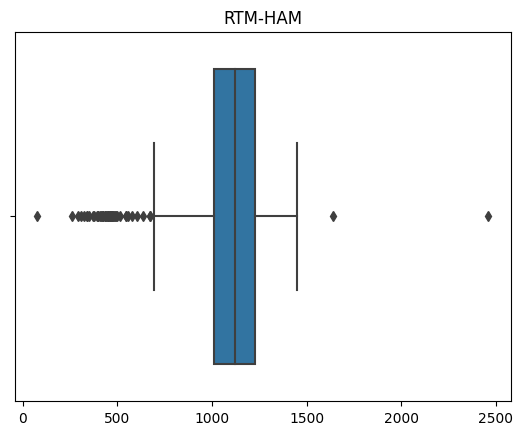

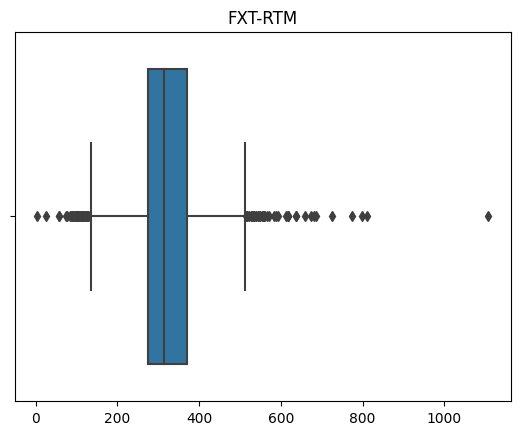

In [25]:
sns.boxplot(x=df_rtm_ham['TripID'].value_counts().values)
plt.title('RTM-HAM')
plt.show()

sns.boxplot(x=df_fxt_rtm['TripID'].value_counts().values)
plt.title('FXT-RTM')
plt.show()


Minimum: 77
Lower Bound: 689.125
Q1: 1011.25
Median: 1121.0
Q3: 1226.0
Upper Bound: 1548.125
Maximum: 2461
IQR: 214.75


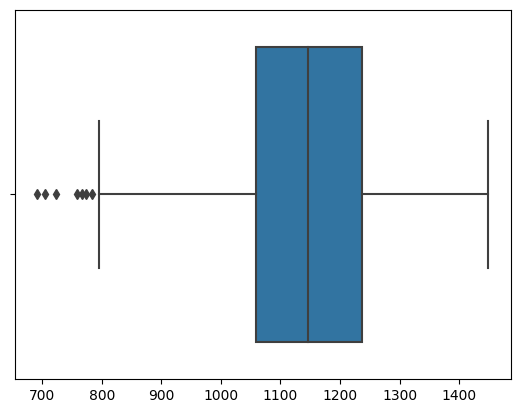

Minimum: 692
Lower Bound: 793.875
Q1: 1059.75
Median: 1146.5
Q3: 1237.0
Upper Bound: 1502.875
Maximum: 1449
IQR: 177.25


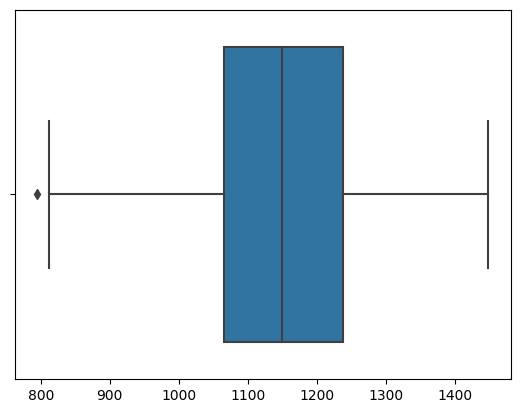

Minimum: 4
Lower Bound: 132.5
Q1: 275.0
Median: 313.0
Q3: 370.0
Upper Bound: 512.5
Maximum: 1108
IQR: 95.0


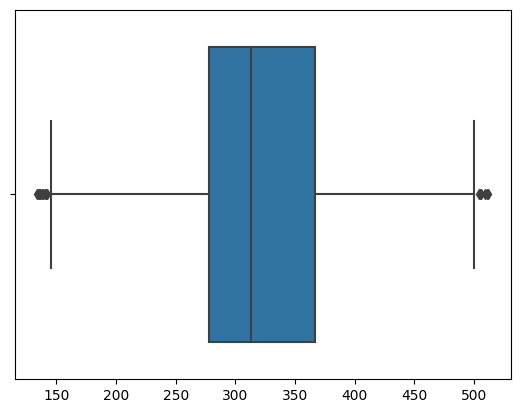

Minimum: 134
Lower Bound: 144.5
Q1: 278.0
Median: 313.0
Q3: 367.0
Upper Bound: 500.5
Maximum: 512
IQR: 89.0


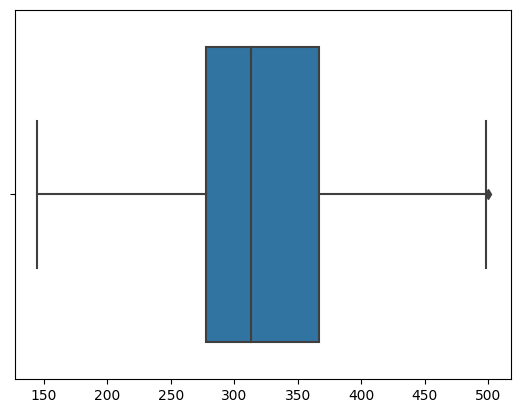

In [26]:
def drop_entry_amount_per_trip_outliers(df: pd.DataFrame, print_info=False):
    new_df = df.copy()
    trip_id_val_counts = new_df['TripID'].value_counts()
    data = trip_id_val_counts.values
    Q1 = np.percentile(data, 25)
    Q2 = np.percentile(data, 50)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    factor = 1.5
    lower_bound = Q1 - factor * IQR
    upper_bound = Q3 + factor * IQR
    data_min = np.min(data)
    data_max = np.max(data)

    new_df = new_df[new_df['TripID'].isin(
        trip_id_val_counts.index[trip_id_val_counts.values <= upper_bound])]
    new_df = new_df[new_df['TripID'].isin(
        trip_id_val_counts.index[trip_id_val_counts.values >= lower_bound])]
    new_df = new_df.reset_index(drop=True)

    if print_info:
        print('Minimum:', data_min)
        print('Lower Bound:', lower_bound)
        print('Q1:', Q1)
        print('Median:', Q2)
        print('Q3:', Q3)
        print('Upper Bound:', upper_bound)
        print('Maximum:', data_max)
        print('IQR:', IQR)

    return new_df


for i in range(1, 3):
    df_rtm_ham = drop_entry_amount_per_trip_outliers(
        df_rtm_ham, print_info=True)
    sns.boxplot(x=df_rtm_ham['TripID'].value_counts().values)
    plt.show()

for i in range(1, 3):
    df_fxt_rtm = drop_entry_amount_per_trip_outliers(
        df_fxt_rtm, print_info=True)
    sns.boxplot(x=df_fxt_rtm['TripID'].value_counts().values)
    plt.show()


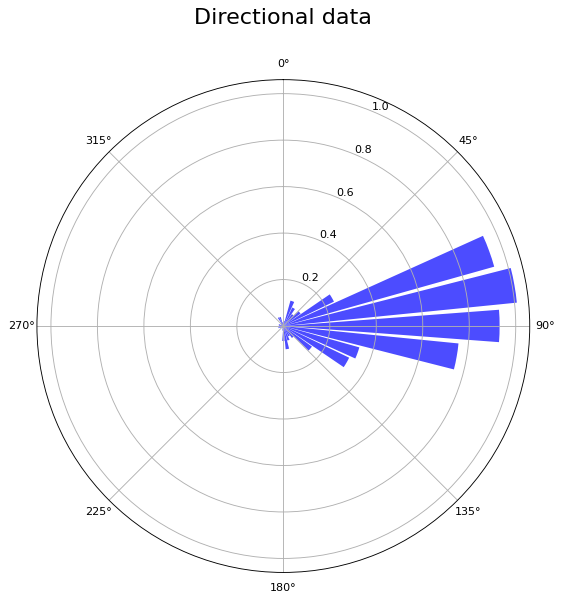

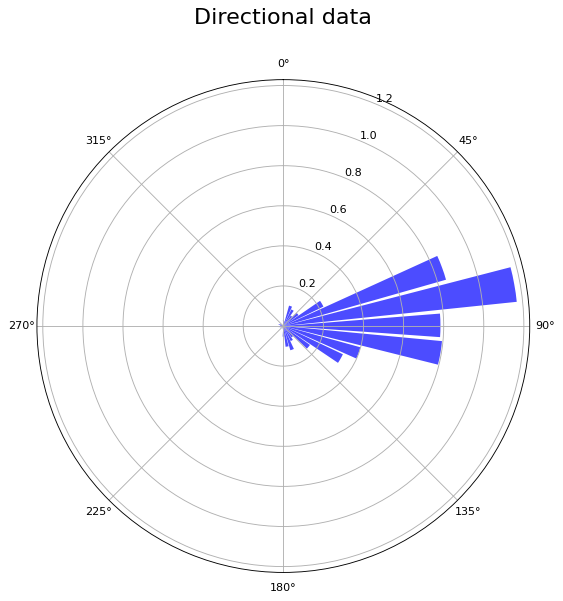

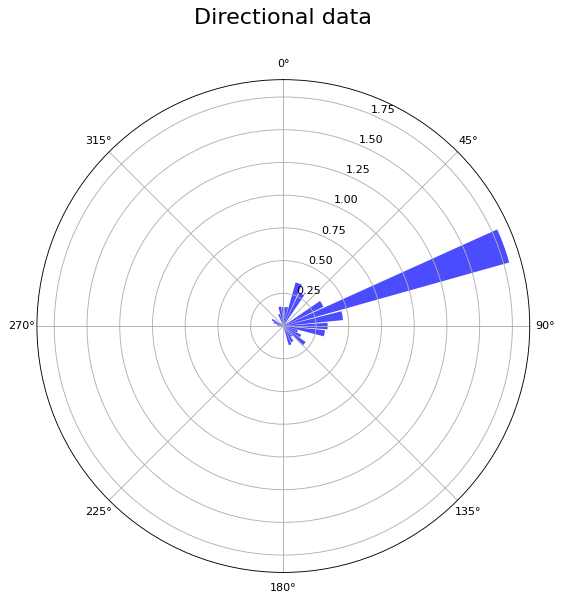

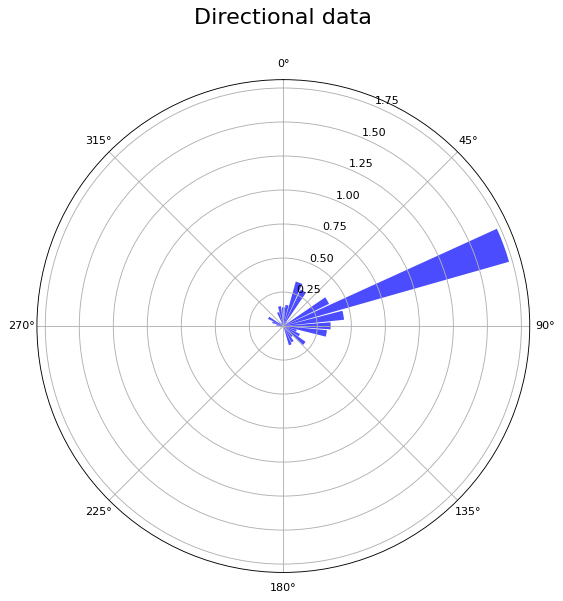

In [27]:
def polar_plot(df: pd.DataFrame):
    plt.figure(figsize=(8, 8), dpi=80)
    plt.subplot(polar=True)

    data = df.values
    data_rad = np.deg2rad(data)
    hist, bin_edges = np.histogram(data_rad, bins=36, density=True)

    plt.bar(bin_edges[:-1], hist, width=0.15, color='b', alpha=0.7)
    plt.gca().set_theta_zero_location('N')
    plt.gca().set_theta_direction(-1)
    plt.title('Directional data', size=20, color='black', y=1.1)
    plt.show()


polar_plot(df_fxt_rtm['COG'])
polar_plot(df_fxt_rtm['TH'])
polar_plot(df_rtm_ham['COG'])
polar_plot(df_rtm_ham['TH'])


# Multivariate Graphical Analysis

First of, as an introduction, we plot the Longitutude Latitude in a scatter plot. To get a feeling for the data.

If one frequently has seen a map of Benelux, Northern Germany and Britain, this looks familiar.

In [28]:
arr = [1, 2, 3, 4, 4]
arr[:]

[1, 2, 3, 4, 4]

C:\Users\Artur\AppData\Local\Temp\ipykernel_15504\2481574260.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df_fxt_rtm, x='Longitude', y='Latitude', palette='coolwarm')


<Axes: xlabel='Longitude', ylabel='Latitude'>

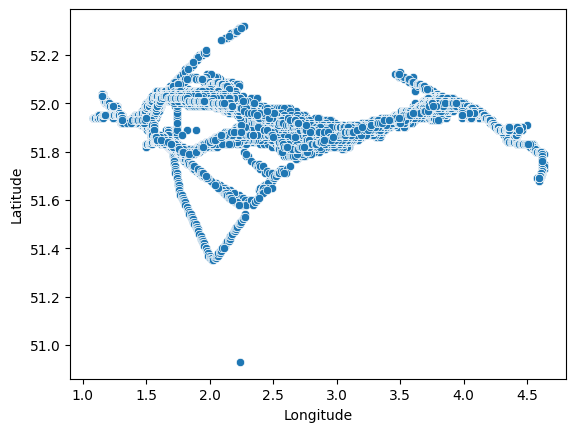

In [29]:
sns.scatterplot(data=df_fxt_rtm, x='Longitude', y='Latitude', palette='coolwarm')


In [30]:
# sns.scatterplot(data=df_combined, x='Longitude', y='Latitude', palette='coolwarm')


import plotly.express as px
import pandas as pd
us_cities = pd.read_csv(
    "https://raw.githubusercontent.com/plotly/datasets/master/us-cities-top-1k.csv")


step_size = 20000
step = 0

fig = px.scatter_mapbox(df_fxt_rtm[step_size * step:step_size * (step+1)], lat="Latitude", lon="Longitude", hover_name="Name", hover_data=[
    "Callsign", "Destination", "MMSI", "TripID"],
    color_discrete_sequence=["fuchsia"], zoom=8, height=None)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})
fig.show()
step += 1


Here we analyse the correlation between features. We see some major correlations.



- 'StartLatitude', 'StartLongitude', 'EndLongitude', 'EndLongitude', 'Latitude', 'Longitude'. Especially the first 4, since roughly the same starting point will always have roughly the same endpoint, because we have only two routes.
- 'StartTime', 'EndTime', 'time'. Since the trips take up roughly the same amount of time, this is to be expected.
- 'Length', 'Breadth', 'Draught'. Dimensions of a ship are correlated.
- 'COG', 'TH' are highly correlated with each other.


It has to be noted that COG and TH are cyclical variables. It means that the beginning and the end of the same range are closer together than to the middle. Because of this it would be best served to transform COG and TH into cos and sin values.

Latitude and Longitude are also cyclical, but because in this context the differences are small, one can regard them as regular ranges.


In [31]:
kljljl

NameError: name 'kljljl' is not defined

<Axes: >

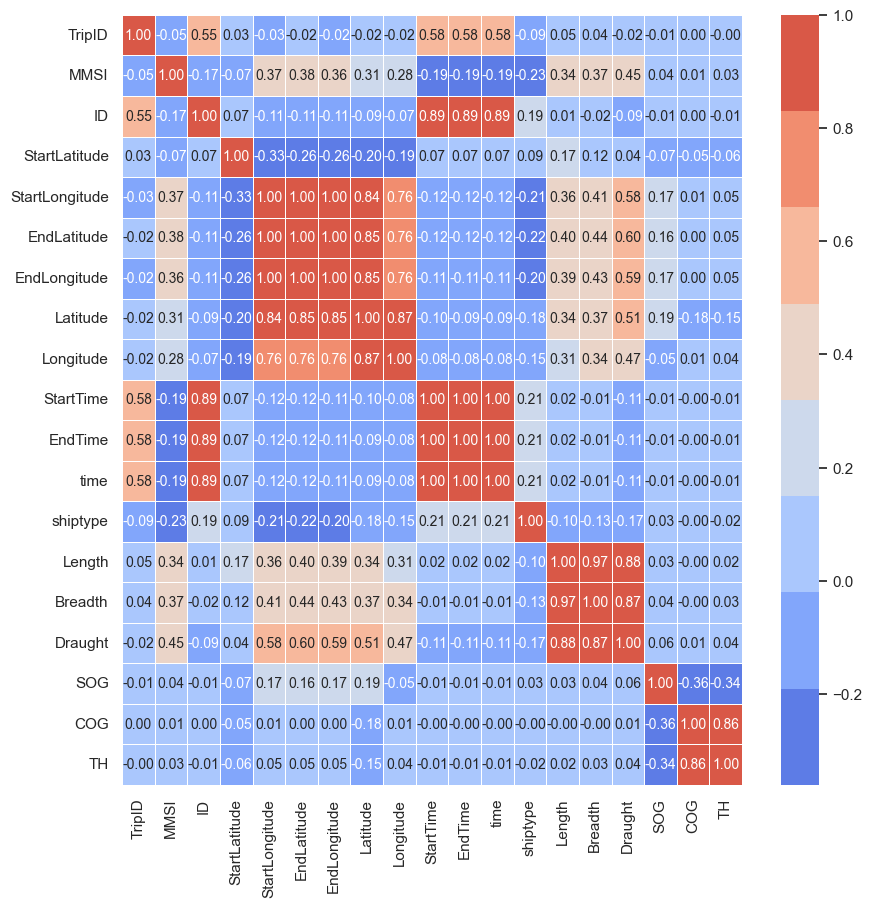

In [32]:


labels = ['TripID', 'MMSI', 'ID',
          'StartLatitude', 'StartLongitude',
          'EndLatitude', 'EndLongitude',
          'Latitude', 'Longitude',
          'StartTime', 'EndTime', 'time',
          'StartPort', 'EndPort',
          'shiptype', 'Length', 'Breadth', 'Draught',
          'SOG', 'COG', 'TH',
          'Destination', 'Name', 'Callsign',
          'AisSourcen']
df_combined = df_combined.reindex(columns=labels)
sns.set(rc={'figure.figsize': (10, 10)})
sns.heatmap(df_combined.corr(numeric_only=True),
            annot=True,
            linewidths=.5, fmt='.2f', annot_kws={'size': 10},
            cmap=sns.color_palette("coolwarm", 8))




Herse we combine various labels and remove others.

<Axes: >

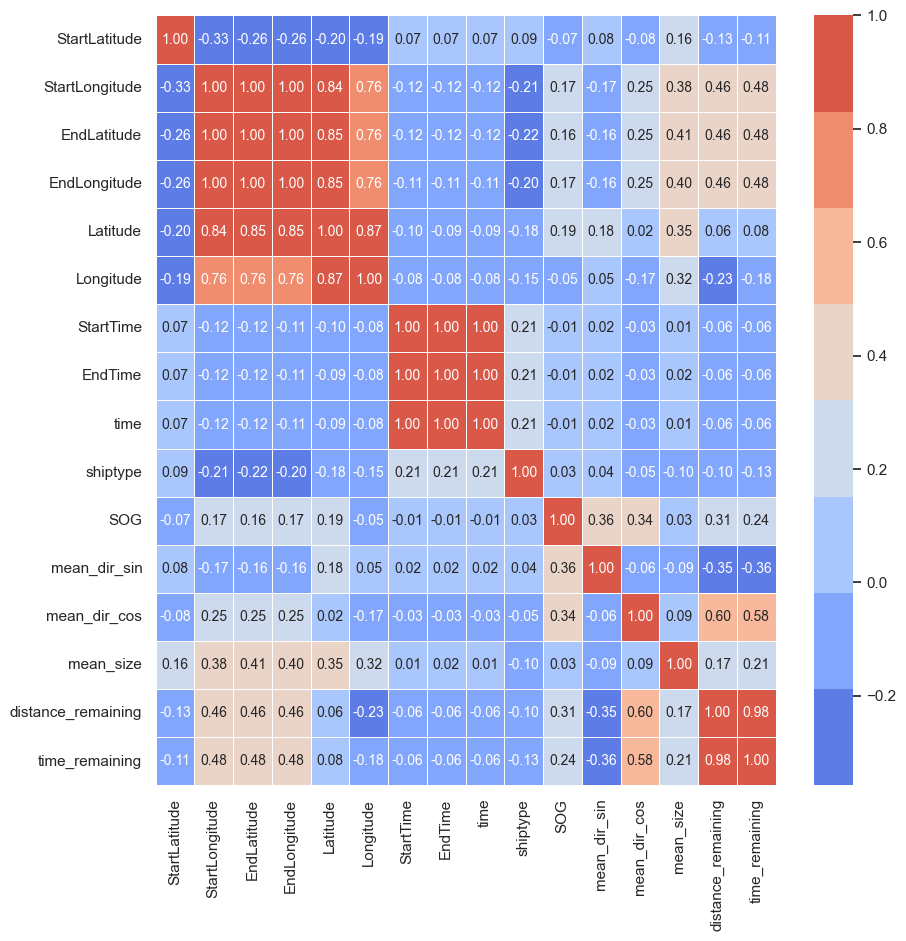

In [34]:
import math


def deg_to_sin(deg: int) -> float:
    rad = np.deg2rad(deg)
    return np.sin(rad)


def deg_to_cos(deg: int) -> float:
    rad = np.deg2rad(deg)
    return np.cos(rad)


def haversine_distance(start_lat: float, start_lon: float, end_lat: float, end_lon: float) -> float:
    '''
        This function takes two coordinates and calculates the distance between them using the Haversine formula.
        Parameters
        ----------
        start_lat : float
            The latitude of the starting point.
        start_lon : float
            The longitude of the starting point.
        end_lat : float
            The latitude of the ending point.
        end_lon : float
            The longitude of the ending point.

        Returns
        -------
        distance : float
            The distance between the two coordinates in kilometers.
    '''
    # Convert latitude and longitude from degrees to radians
    lat1, lon1, lat2, lon2 = map(
        math.radians, [start_lat, start_lon, end_lat, end_lon])

    # Earth radius in kilometers
    R = 6371.0

    # Differences in coordinates
    dlat = lat2 - lat1
    dlon = lon2 - lon1

    # Haversine formula
    a = math.sin(dlat/2)**2 + math.cos(lat1) * \
        math.cos(lat2) * math.sin(dlon/2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))

    # Distance in kilometers
    distance = R * c

    return distance


def prepare_distance(df: pd.DataFrame) -> pd.DataFrame:
    '''
        This function takes a dataframe with 'Latitude', 'Longitude', 'EndLatitude' and 'EndLongitude' columns.
        It calculates the distance between the start and end point of the trip and adds it as a new column as 'distance_remaining'.
    '''
    new_df = df.copy()
    labels = ['Latitude', 'Longitude', 'EndLatitude', 'EndLongitude']
    new_df['distance_remaining'] = new_df[labels].apply(
        lambda x: haversine_distance(*x), axis=1)
    return new_df


def prepare_time(df: pd.DataFrame) -> pd.DataFrame:
    '''
        This function takes a dataframe with 'StartTime', 'EndTime' and 'time' columns.
        It calculates the time remaining until the end of the trip and adds it as a new column as 'time_remaining'.
    '''
    new_df = df.copy()
    new_df["time_remaining"] = (
        new_df["EndTime"] - new_df["StartTime"]) - (new_df["time"] - new_df["StartTime"])
    return new_df


def prepare_COG_TH(df: pd.DataFrame) -> pd.DataFrame:
    '''
        This function takes a dataframe with 'COG' and 'TH' columns.
        It takes the mean of the two columns and then converts it to sin and cos.

        The reasoning is that COG and TH are cyclic variables and also highly correlated.
        It is better to have only one label that represents both of them. In the end,
        we will have two labels, 'mean sin' and 'mean cos', but that is because this is the best
        way to represent cyclic variables.
    '''
    new_df = df.copy()
    labels = ['COG', 'TH']
    mean_direction = new_df[labels].mean(axis=1)
    new_df['mean_dir_sin'] = mean_direction.apply(lambda x: deg_to_sin(x))
    new_df['mean_dir_cos'] = mean_direction.apply(lambda x: deg_to_cos(x))
    new_df = new_df.drop(labels, axis=1)
    return new_df


def prepare_Length_Breadth_Draught(df: pd.DataFrame) -> pd.DataFrame:
    new_df = df.copy()
    labels = [
        'Length',
        'Breadth',
        'Draught'
    ]
    mean_size = new_df[labels].mean(axis=1)
    new_df['mean_size'] = mean_size
    new_df = new_df.drop(labels, axis=1)
    return new_df


df_combined = df_combined.reindex(columns=labels)
__data33 = prepare_COG_TH(df_combined)
__data33 = prepare_Length_Breadth_Draught(__data33)
__data33 = prepare_distance(__data33)
__data33 = prepare_time(__data33)
__data33 = __data33.drop(['TripID', 'MMSI', 'ID'], axis=1)

sns.heatmap(__data33.corr(numeric_only=True),
            annot=True,
            linewidths=.5, fmt='.2f', annot_kws={'size': 10},
            cmap=sns.color_palette("coolwarm", 8))
